In [2]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
musickey = '85b3bdb8bd0645e5b070b58deb055d27' #apikey

In [54]:
# testing to see functionality
musicurl = f'https://ws.audioscrobbler.com/2.0/?method=album.getinfo&api_key={musickey}&artist=Cher&album=Believe&format=json'
ff = f'https://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist=cher,madonna&api_key={musickey}&format=json'
top = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&format=json'
artist = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist=Cher&api_key={musickey}&format=json'

In [55]:
topartists1 = json.loads(requests.get(top).text) # get list of fifty top artists

In [56]:
top2 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=2&format=json'
topartists2 = json.loads(requests.get(top2).text)
#topartists2 #get fifty more top artists

In [57]:
top3 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=3&format=json'
topartists3 = json.loads(requests.get(top3).text)
#topartists3 # get fifty more top artists

In [58]:
top4 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=4&format=json'
topartists4 = json.loads(requests.get(top4).text)
#topartists4 # get fifty more top artists

In [59]:
top5 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=5&format=json'
topartists5 = json.loads(requests.get(top5).text)
#topartists5 # get fifty more top artists

In [60]:
top6 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=6&format=json'
topartists6 = json.loads(requests.get(top6).text)
#topartists6 # get fifty more top artists

In [71]:
top7 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=7&format=json'
topartists7 = json.loads(requests.get(top7).text)
#topartists7 # get fifty more top artists

In [92]:
topartists1['artists']['artist'][0] # figuring out data structure
tal1 = [entry['name'] for entry in topartists1['artists']['artist']] # pull out names of each set of fifty artists
tal2 = [entry['name'] for entry in topartists2['artists']['artist']]
tal3 = [entry['name'] for entry in topartists3['artists']['artist']]
tal4 = [entry['name'] for entry in topartists4['artists']['artist']]
tal5 = [entry['name'] for entry in topartists5['artists']['artist']]
tal6 = [entry['name'] for entry in topartists6['artists']['artist']]
tal7 = [entry['name'] for entry in topartists7['artists']['artist']]
artist_list = tal1 + tal2 + tal3 + tal4 + tal5 + tal6 + tal7 # append lists of names together
len(artist_list)
artist_list = set(artist_list)
len(artist_list)

346

In [89]:
all_info = [] # initialize empty list to fill with artist info
for artist in artist_list:
    url = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist={artist}&api_key={musickey}&format=json'
    all_info.append(json.loads(requests.get(url).text)) # make a artist info request with each name in artist_list
    # and append to all_info
#all_info

In [90]:
all_info

[{'artist': {'name': 'Pierce The Veil',
   'mbid': '8ed919fb-eaee-45a1-ba99-b3ede9ca5f1d',
   'url': 'https://www.last.fm/music/Pierce+The+Veil',
   'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'small'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'medium'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'large'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'extralarge'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': 'mega'},
    {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
     'size': ''}],
   'streamable': '0',
   'ontour': '0',
   'stats': {'listeners': '1131032', 'playcount': '81849436'},
   'similar': 

In [96]:
# extract playcounts for each artist
all_info[0]['artist']['stats']['playcount'] # figuring out structure of data
playcounts = [entry['artist']['stats']['playcount'] for entry in all_info]

In [97]:
# extract listeners for each artist
listeners = [entry['artist']['stats']['listeners'] for entry in all_info]

In [100]:
#### figuring out the structure of the genres data with one entry


#ts = list(all_info[0]['artist'].values())
#new_attempt = [[list(entry['artist'].values())[i] for i in [0,8]] for entry in all_info]
#print(type(new_attempt[0][1]))
#print(new_attempt)
#[list(entry['artist'].values())[i] for i in [0,8] for sublist in all_info for entry in sublist]
#genrespt1 = [entry['artist']['tags']['tag'] for entry in all_info]
#genrespt1 = [entry['artist'][['name','tags']] for entry in all_info]
#print(genrespt1)
#print(genrespt1[0][0])
#[entry['name'] for sublist in genrespt1 for entry in sublist]
#[entry[1] for entry in new_attempt]
#genrespt1

#entry['artist'][i] for i in ['name','tags'] for entry in all_info]

name ontour                                               tags  \
286  Taylor Swift      1  [country, pop, female vocalists, singer-songwr...   

      playcount listeners  
286  1884917449   4359692

In [101]:
# create a data frame from all_info
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
# drop extraneuous or incorrectly formatted columns
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
# add columns that I created earlier
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
# start tackling the genre problem
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
uniquegenre = []
for i in range(len(genrecrap)):
    for j in range(len(genrecrap[i])):
        if genrecrap[i][j] not in uniquegenre:
            uniquegenre.append(genrecrap[i][j])
# with a list of unique genres, I now can manually remove any genres that
# I don't want featured in the final data set
to_remove = ['Canadian','seen live','compton','ofwgkta','r&b','australian','britpop','female vocalists',
                   'swag','female vocalist','slow jams','UK Garage','2-step','Korean','black metal',
                    'Eminem','pittsburgh','New Zealand','slowcore','hip hop','Kpop',
                   'better than selena gomez','jay-z','legend','Brent Faiyaz',
                   'Sophisti-Pop','one direction','X factor','spanish','Dirty South','ten million plays',
                   'mf doom','plugg','rage','Mariah Carey','guilty pleasure','downtempo','new york','opium',
                   'dnb','Horrorcore','sexy','noise','shoegazer','florida','United States',
                   'thicc','idm','Minnesota','miami','chicago','soprano sax','glam','atlanta','drone rock']
goodgenres = [item for item in uniquegenre if item not in to_remove]
# make a list with each entry being a list of three approved genres
for i in range(len(genrecrap)):
    genrecrap[i] = [entry for entry in genrecrap[i] if entry not in to_remove]
for entry in genrecrap:
    while len(entry) < 3:
        entry.append('NA')
# move the entries into the data frame
prelimdf['genre1'] = [entry[0] for entry in genrecrap]
prelimdf['genre2'] = [entry[1] for entry in genrecrap]
prelimdf['genre3'] = [entry[2] for entry in genrecrap]
### standardizing genre spelling, there were multiple variations of several of
### genres, for example, 'hip hop', 'Hiphop', etc.

#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
prelimdf['genre1'] = prelimdf['genre1'].str.lower().str.replace('-',' ')
#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
prelimdf['genre2'] = prelimdf['genre2'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf['genre3'] = prelimdf['genre3'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf.drop(columns='tags',inplace=True)

In [ ]:
#### this code string was just used for checking individual entries

#for i in range(len(genrecrap)):
#    print(i, len(genrecrap[i]) >= 3)
# 168, 133, 57
#genrecrap[168]
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
#prelimdf[prelimdf['name'] == 'Taylor Swift']

In [102]:
prelimdf

name ontour  playcount listeners            genre1  \
0    Pierce The Veil      0   81849436   1131032     post hardcore   
1         Ed Sheeran      1  179979468   3125873          acoustic   
2        Nicki Minaj      1  183090599   3609036           hip hop   
3               Muse      0  418280263   5015125  alternative rock   
4      Black Sabbath      0  142624552   3322344       heavy metal   
..               ...    ...        ...       ...               ...   
341         Deftones      0  252879073   2789174          nu metal   
342           Future      0  177789857   1929532           hip hop   
343        New Order      0   83116187   2505526          new wave   
344         NewJeans      1  129667795    885489             k pop   
345      Frank Ocean      1  404409989   2888623               rnb   

         genre2             genre3  
0       emocore                emo  
1       british  singer songwriter  
2           rap                rnb  
3          rock        alternative  
4     hard rock       classic rock  
..          ...                ...  
341       metal        alternative  
342         rap               trap  
343  electronic          post punk  
344         rnb                pop  
345        soul            hip hop  

[346 rows x 7 columns]

In [104]:
artists = prelimdf

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# testing out different ways of slicing the data
popgenre = artists[(artists['genre1'] == 'pop') | (artists['genre2'] == 'pop') | (artists['genre3'] == 'pop')]
hiphopgenre = artists[(artists['genre1'] == 'hip hop') | (artists['genre2'] == 'hip hop') | (
    artists['genre3'] == 'hip hop')]

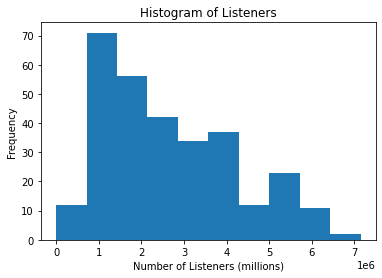

In [103]:
plt.hist(artists['listeners'].astype(int), bins=10);
plt.xlabel('Number of Listeners (millions)');
plt.ylabel('Frequency');
plt.title('Histogram of Listeners');
#plt.savefig('listenershist.jpg')

In [108]:
for i in range(len(artists)):
    print(artists['name'][i])

Pierce The Veil
Ed Sheeran
Nicki Minaj
Muse
Black Sabbath
aespa
Depeche Mode
Elton John
ABBA
Big Thief
Gwen Stefani
Laufey
Young Thug
Amy Winehouse
Miguel
Arctic Monkeys
The Weeknd
Nirvana
System of a Down
Nelly Furtado
Drake
Glass Animals
Kylie Minogue
The Strokes
Metallica
Aminé
Lana Del Rey
Kelly Clarkson
Michael Jackson
Zach Bryan
Snoop Dogg
BROCKHAMPTON
Lil Baby
VACATIONS
Hozier
Wham!
Ariana Grande
Cardi B
Suki Waterhouse
Camila Cabello
Tory Lanez
One Direction
Surf Curse
The 1975
Jeff Buckley
a-ha
Bon Iver
Katy Perry
The Doors
Cigarettes After Sex
Madvillain
Lil Wayne
d4vd
Sia
Pinegrove
Gucci Mane
Timbaland
Joji
Pitbull
David Bowie
Eminem
Steve Lacy
Lil Nas X
Troye Sivan
Car Seat Headrest
Red Velvet
Mitski
The Kid Laroi
SZA
Mac DeMarco
Calvin Harris
Joy Division
Phoebe Bridgers
Gorillaz
Migos
Lizzy McAlpine
Dr. Dre
Linkin Park
Marshmello
$uicideboy$
Tears for Fears
The Smiths
Kali Uchis
Rosalía
Coldplay
Jack Harlow
Mac Miller
Kodak Black
Queens of the Stone Age
Michael Bublé
Ken 

In [276]:
artists[artists['name'] == 'Dave']

name ontour playcount listeners genre1 genre2  genre3
268  Dave      1  38585931    745824    rap  grime  french

In [24]:
# manually acquiring age and sex
years = [2006, 2013, 2004, 2010, 2010, 2011, 2011, 2006, 2012, 2005, 2018, 2019, 2017, 1993, 2021, 2012, 2015,
        2013, 2019, 2008, 2010, 2011, 2000, 2013, 2003, 2018, 2017, 2023, 2005, 1963, 1984, 2016, 1989, 2018, 2010, 
        2017, 2001, 2001, 2012, 2017, 1996, 2014, 2015, 2011, 1968, 2010, 2018, 1973, 2013, 2019, 2018, 2010,
        1972, 2013, 2007, 1996, 1999, 2011, 2017, 1995, 1979, 2001, 2007, 2021, 2002, 2020, 2008, 2012, 1984,
        1990, 2000, 2017, 2022, 2017, 1995, 2014, 2020, 2014, 2013, 2017, 1969, 2017, 2009, 2015, 2002, 2011, 2006,
        2012, 2021, 1967, 2009, 2002, 1967, 2017, 2017, 1997, 2010, 1973, 1998, 2005, 2018, 2004, 2007, 1991, 1988,
        2011, 1993, 2008, 2003, 2000, 2018, 2023, 2023, 1964, 2016, 2022, 2015, 2019, 2020, 2013, 2014, 1994, 1983,
        1994, 1999, 1990, 2009, 2017, 2016, 1991, 2000, 1998, 2002, 1983, 1999, 2023, 2010, 2014, 2000, 2013, 2021,
        2018, 1995, 2017, 2022, 2015, 2009, 2023, 2017, 1983, 2020, 1999, 2021, 2011, 2002, 2019, 2010, 2004, 2008,
        1946, 2015, 2019, 2010, 1999, 1997, 2007, 2006, 1990, 2020, 2010, 2018, 1982, 2012, 2014, 2020, 1971, 2015,
        2019, 2020, 1969, 2019, 1994, 2018, 1994, 2023, 2017, 1991, 2015, 2008, 2019, 2021, 2019, 2012, 2021, 2003,
        2019, 2005, 1970, 2016, 2018, 2011, 2003, 1991, 1977, 2016, 1998, 1991, 2017, 1978, 2014, 2015, 2017, 2004,
        1994, 1981, 2012, 2017, 1965, 2021, 1994, 2017, 2014, 2020, 2015, 2023, 2018, 2007, 1992, 2014, 2020, 2017,
        2007, 2016, 2013, 2017, 1987, 1994, 2022, 2006, 2023, 1978, 2017, 1999, 1984, 2018, 2008, 2019, 1983, 2007]
sex = ['f', 'm', 'm', 'm', 'f', 'm', 'm', 'mb', 'f', 'f', 'f', 'f', 'f', 'mb', 'f', 'm', 'm', 'f', 'm', 'f', 'm',
       'm', 'mb', 'mb', 'f', 'f', 'm', 'f', 'mfb', 'mb', 'mb', 'm', 'mb', 'm', 'm', 'f', 'f', 'mfb', 'm', 'm',
      'm', 'mb', 'm', 'm', 'mfb', 'f', 'm', 'mb', 'f', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'mb',
      'mb', 'mb', 'm', 'm', 'mb', 'f', 'f', 'm', 'mb', 'mb', 'mb', 'mfb', 'fb', 'm', 'mb', 'm', 'm', 'mfb', 'f',
      'm', 'm', 'f', 'm', 'f', 'mb', 'm', 'mfb', 'mb', 'f', 'mb', 'mb', 'm', 'm', 'm', 'm', 'mb', 'm', 'mfb', 
      'mb', 'mb', 'm', 'mb', 'mb', 'mb', 'mfb', 'mb', 'mfb', 'mb', 'mb', 'f', 'm', 'm', 'm', 'mb', 'm', 'f', 'f',
      'm', 'm', 'mb', 'mb', 'mb', 'mb', 'mb', 'm', 'f', 'f', 'm', 'm', 'f', 'm', 'mfb', 'm', 'mb', 'm', 'm', 'f',
      'm', 'f', 'f', 'm', 'm', 'mb', 'm', 'f', 'f', 'mfb', 'fb', 'fb', 'f', 'm', 'mb', 'm', 'm', 'f', 'm', 'f',
      'm', 'f', 'm', 'm', 'mb', 'f', 'mb', 'f', 'mb', 'mb', 'mfb', 'm', 'm', 'mb', 'mfb', 'm', 'mb', 'fb', 'm',
      'm', 'f', 'f', 'mb', 'm', 'm', 'm', 'mb', 'fb', 'm', 'm', 'fb', 'f', 'mb', 'fb', 'm', 'm', 'm', 'm', 'f',
      'm', 'mb', 'm', 'mb', 'mfb', 'f', 'mb', 'mfb', 'm', 'mb', 'mfb', 'm', 'mb', 'mb', 'f', 'mb', 'f', 'm', 'mb',
      'mfb', 'mb', 'mb', 'm', 'mb', 'f', 'f', 'm', 'mb', 'fb', 'm', 'mfb', 'm', 'm', 'm', 'm', 'mfb', 'mb', 'm',
      'm', 'mfb', 'mfb', 'f', 'm', 'f', 'f', 'm', 'mfb', 'f', 'f', 'mfb', 'm', 'mb', 'mb']

249

In [180]:
print(years[244])
print(sex[244])

2018
f


In [216]:
# I discovered there were actually a bunch of duplicates, unfortunately
oldartists = pd.read_csv('oldartists.csv')
oldartists = oldartists.drop_duplicates().reset_index(drop=True)
oldartists = oldartists.drop([50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68]).reset_index(drop=True)
oldartists['sex'] = sex
oldartists['year'] = years
oldartists2 = oldartists[['name', 'sex', 'year']]

In [249]:
# I had to figure out how to merge the manually acquired data with the
# original data frame

f = pd.merge(artists, oldartists2, how='left')
#print(len(f['sex'][f['sex'].isna()]))
#len(f['year'][f['year'].isna()])
need_info = f[['name','sex','year']][f['year'].isna()]

In [281]:
# still working on merging

pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)
need_info['sex'] = sex2
need_info['year'] = years2
need_info

name  sex  year
9                       Big Thief  mfb  2016
22                  Kylie Minogue    f  1988
25                          Aminé    m  2017
27                 Kelly Clarkson    f  2003
29                     Zach Bryan    m  2019
30                     Snoop Dogg    m  1993
39                 Camila Cabello    f  2018
42                     Surf Curse   mb  2013
44                   Jeff Buckley    m  1994
45                           a-ha   mb  1983
48                      The Doors   mb  1967
50                     Madvillain   mb  2004
52                           d4vd    m  2023
54                      Pinegrove  mfb  2012
55                     Gucci Mane    m  2005
56                      Timbaland    m  1998
64              Car Seat Headrest  mfb  2010
71                   Joy Division   mb  1979
75                 Lizzy McAlpine    f  2020
76                        Dr. Dre    m  1992
88        Queens of the Stone Age  mfb  1998
89                  Michael Bublé    m  2001
97                  Elvis Presley    m  1956
99                        Blondie  mfb  1976
105                     JPEGMAFIA    m  2016
106                 Isaiah Rashad    m  2014
110                    Billy Idol    m  1982
115                    The Marías  mfb  2021
129                     Aaron May    m  2019
131                    The Mamas    fb  2020
132                          ROAR    m  2016
135                           M83  mfb  2001
141        SKI MASK THE SLUMP GOD    m  2018
142             The Goo Goo Dolls   mb  1987
146                    STRAY KIDS   mb  2020
151                         AC/DC   mb  1975
154                        Tiësto    m  2001
155        A BOOGIE WIT DA HOODIE    m  2017
159                         Ghost   mb  2010
160  Creedence Clearwater Revival   mb  1968
163             Foster the People   mb  2011
167                   John Lennon    m  1970
169                          Tyla    f  2023
171                       ENHYPEN    m  2021
174                 Stevie Wonder    m  1962
175                     Aerosmith   mb  1973
176                  Jimi Hendrix    m  1967
177                 The Offspring   mb  1989
178                   The walters   mb  2014
179                 Kings of Leon   mb  2003
185                Paul McCartney    m  1970
187               Earl Sweatshirt    m  2013
188                 Bryson Tiller    m  2015
189           My Bloody Valentine  mfb  1988
195                 The Lumineers  mfb  2012
200                      (G)I-DLE   fb  2022
203                  Current Joys    m  2013
204                      DJ Snake    m  2016
208                   Evanescence  mfb  2003
214                     Pearl Jam   mb  1991
218                Ellie Goulding    f  2010
223                     Tom Odell    m  2013
227                   Dean Martin    m  1953
230                           Nas    m  1994
233          Two Door Cinema Club   mb  2010
234                         Björk    f  1993
243                  Salvia Palth    m  2013
246                        R.E.M.   mb  1983
253                   Limp Bizkit   mb  1997
259                   Fiona Apple    f  1996
265                    NLE Choppa    m  2020
268                          Dave    m  2019
271                      Bon Jovi   mb  1984
273                      Ice Cube    m  1990
275                      Yot Club    m  2022
277                 Elliott Smith    m  1994
278               Alice in Chains   mb  1990
282                          P!nk    f  2000
283                        Eagles   mb  1972
285             League of Legends  nab  3000
287                The Beach Boys   mb  1962
289                   ScHoolboy Q    m  2011
291                 Gracie Abrams    f  2023
294                      Cavetown    m  2015
302                  Rae Sremmurd   mb  2015
304                   Fifty Fifty   fb  2022
305                   omar apollo    m  2022
310                   Beach Bunny  mfb  2020
311                     

In [277]:
# had to go back in and get more data manually because I messed something up

years2 = [2016, 1988, 2017, 2003, 2019, 1993, 2018, 2013, 1994, 1983, 1967, 2004, 2023, 2012, 2005, 1998, 2010,
         1979, 2020, 1992, 1998, 2001, 1956, 1976, 2016, 2014, 1982, 2021, 2019, 2020, 2016, 2001, 2018, 1987, 
         2020, 1975, 2001, 2017, 2010, 1968, 2011, 1970, 2023, 2021, 1962, 1973, 1967, 1989, 2014, 2003, 1970,
         2013, 2015, 1988, 2012, 2022, 2013, 2016, 2003, 1991, 2010, 2013, 1953, 1994, 2010, 1993, 2013, 1983, 
         1997, 1996, 2020, 2019, 1984, 1990, 2022, 1994, 1990, 2000, 1972, 3000, 1962, 2011, 2023, 2015, 2015, 
         2022, 2022, 2020, 2022, 2013, 2014, 1972, 1959, 2018, 2008, 1961, 1967, 2004, 1977]

sex2 = ['mfb', 'f', 'm', 'f', 'm', 'm', 'f', 'mb', 'm', 'mb', 'mb', 'mb', 'm', 'mfb', 'm', 'm', 'mfb', 'mb',
       'f', 'm', 'mfb', 'm', 'm', 'mfb', 'm', 'm', 'm', 'mfb', 'm', 'fb', 'm', 'mfb', 'm', 'mb', 'mb', 'mb',
       'm', 'm', 'mb', 'mb', 'mb', 'm', 'f', 'm', 'm', 'mb', 'm', 'mb', 'mb', 'mb', 'm', 'm', 'm', 'mfb', 'mfb',
       'fb', 'm', 'm', 'mfb', 'mb', 'f', 'm', 'm', 'm', 'mb', 'f', 'm', 'mb', 'mb', 'f', 'm', 'm', 'mb', 'm',
       'm', 'm', 'mb', 'f', 'mb', 'nab', 'mb', 'm', 'f', 'm', 'mb', 'fb', 'm', 'mfb', 'm', 'm', 'm', 'm', 'f',
       'mfb', 'm', 'm', 'mfb', 'm', 'mb']

In [369]:
# finally got the merge correct
# also had to drop a three artists that were either blank or too different
# to be used in my analysis

merged_df = pd.merge(f, need_info, on='name', how='left')
merged_df['sex_x'] = merged_df['sex_x'].combine_first(merged_df['sex_y'])
merged_df['year_x'] = merged_df['year_x'].combine_first(merged_df['year_y'])
merged_df = merged_df.drop(columns=['sex_y', 'year_y'])
final_artists = merged_df
final_artists = final_artists.rename(columns={'sex_x':'sex','year_x':'first_album'})
final_artists['age (since 1st album)'] = 2023-final_artists['first_album']
final_artists = final_artists.drop([131, 327]).reset_index(drop=True)
final_artists[final_artists['name'] == 'The Mamas ']
final_artists = final_artists.drop(284).reset_index(drop=True)

Empty DataFrame
Columns: [name, ontour, playcount, listeners, genre1, genre2, genre3, sex, first_album, age (since 1st album)]
Index: []

In [19]:
#final_artists.to_csv('artists.csv', index=False)

In [3]:
final_artists = pd.read_csv('artists.csv')
final_artists

name  ontour  playcount  listeners            genre1  \
0    Pierce The Veil       0   81849436    1131032     post hardcore   
1         Ed Sheeran       1  179979468    3125873          acoustic   
2        Nicki Minaj       1  183090599    3609036           hip hop   
3               Muse       0  418280263    5015125  alternative rock   
4      Black Sabbath       0  142624552    3322344       heavy metal   
..               ...     ...        ...        ...               ...   
338         Deftones       0  252879073    2789174          nu metal   
339           Future       0  177789857    1929532           hip hop   
340        New Order       0   83116187    2505526          new wave   
341         NewJeans       1  129667795     885489             k pop   
342      Frank Ocean       1  404409989    2888623               rnb   

         genre2             genre3 sex  first_album  age (since 1st album)  
0       emocore                emo  mb       2007.0                   16.0  
1       british  singer songwriter   m       2011.0                   12.0  
2           rap                rnb   f       2010.0                   13.0  
3          rock        alternative  mb       1999.0                   24.0  
4     hard rock       classic rock  mb       1970.0                   53.0  
..          ...                ...  ..          ...                    ...  
338       metal        alternative  mb       1995.0                   28.0  
339         rap               trap   m       2012.0                   11.0  
340  electronic          post punk  mb       1977.0                   46.0  
341         rnb                pop  fb       2022.0                    1.0  
342        soul            hip hop   m       2012.0                   11.0  

[343 rows x 10 columns]

In [6]:
final_artists['playcount'].sort_values()

168       2506482
257       4121529
327       9261856
141      10935772
129      12415135
          ...    
283     784481025
26      800159312
167     879809322
216    1866639416
284    1884917449
Name: playcount, Length: 343, dtype: int64

In [9]:
final_artists[final_artists['playcount'] == 800159312]

name  ontour  playcount  listeners genre1     genre2 genre3 sex  \
26  Lana Del Rey       0  800159312    3757731  indie  indie pop    pop   f   

    first_album  age (since 1st album)  
26       2010.0                   13.0

In [ ]:
# The rest of the code is just doing EDA.

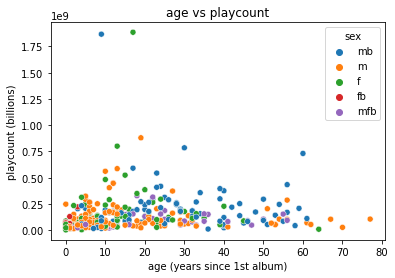

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=final_artists, x='age (since 1st album)', y='playcount', hue='sex')
plt.title('age vs playcount')
plt.xlabel('age (years since 1st album)')
plt.ylabel('playcount (billions)')
plt.savefig("age_playcount.jpg")

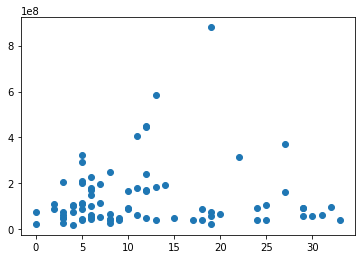

In [85]:
hip_hop_artists = final_artists[final_artists[['genre1', 'genre2', 'genre3']].isin(['hip hop']).any(axis=1)]
pop_artists = final_artists[final_artists[['genre1', 'genre2', 'genre3']].isin(['pop']).any(axis=1)]

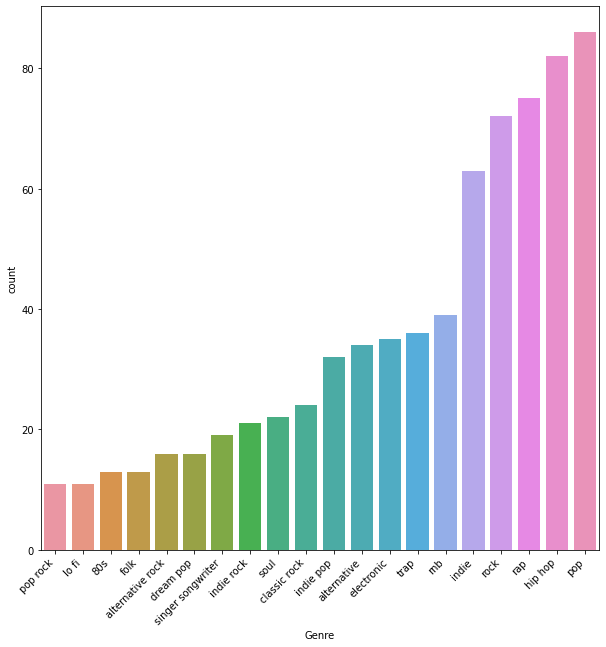

In [34]:
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)
genres_total = final_artists['genre1'].value_counts() + final_artists['genre2'].value_counts() + (
    final_artists['genre3'].value_counts())
genres_total = genres_total.dropna()
top_20_genres = pd.DataFrame(genres_total[genres_total > 10].sort_values())
top_20_genres = top_20_genres.rename(columns={0:'count'}).reset_index()
#top_20_genres
plt.figure(figsize=(10,10))
plt.xticks(rotation=45, ha="right")
sns.barplot(data=top_20_genres, x='index', y='count')
plt.xlabel('Genre')
plt.savefig('genresbarplot.jpg')

In [18]:
genres_total = final_artists['genre1'].value_counts() + final_artists['genre2'].value_counts() + (
    final_artists['genre3'].value_counts())
genres_total = genres_total.dropna()
top_10_genres = pd.DataFrame(genres_total[genres_total > 30].sort_values())
top_10_genres = top_10_genres.rename(columns={0:'count'}).reset_index()
print(top_10_genres)
final_artists

         index  count
0    indie pop   32.0
1  alternative   34.0
2   electronic   35.0
3         trap   36.0
4          rnb   39.0
5        indie   63.0
6         rock   72.0
7          rap   75.0
8      hip hop   82.0
9          pop   86.0


name  ontour  playcount  listeners             genre1  \
0           Pierce The Veil       0   81849436    1131032      post hardcore   
1                Ed Sheeran       1  179979468    3125873           acoustic   
2               Nicki Minaj       1  183090599    3609036            hip hop   
3                      Muse       0  418280263    5015125   alternative rock   
4             Black Sabbath       0  142624552    3322344        heavy metal   
5                     aespa       1   82200071     615862              k pop   
6              Depeche Mode       1  219136579    3478486         electronic   
7                Elton John       0  105311040    3960105                pop   
8                      ABBA       1  105248686    2999234                pop   
9                 Big Thief       0   44149583     770055         indie rock   
10             Gwen Stefani       1   52033052    3193923                pop   
11                   Laufey       1   39011152     714538               jazz   
12               Young Thug       0   99877669    1230730               trap   
13            Amy Winehouse       0  132703596    3449363               soul   
14                   Miguel       1   41001567    1806385                rnb   
15           Arctic Monkeys       0  590519619    5351983         indie rock   
16               The Weeknd       0  561111265    3622518                rnb   
17                  Nirvana       0  357002993    5808751             grunge   
18         System of a Down       0  313341185    4449587              metal   
19            Nelly Furtado       0   68359672    3402839                pop   
20                    Drake       1  585984507    5271101            hip hop   
21            Glass Animals       0   78441487    1760248         electronic   
22            Kylie Minogue       1  117598683    2684649                pop   
23              The Strokes       0  298306959    4459850         indie rock   
24                Metallica       0  375554594    3910517       thrash metal   
25                    Aminé       0   43979981    1080343                rap   
26             Lana Del Rey       0  800159312    3757731              indie   
27           Kelly Clarkson       0   87991147    3354748                pop   
28          Michael Jackson       0  204111172    5046989                pop   
29               Zach Bryan       1   31333757     468063            country   
30               Snoop Dogg       0   58619042    3477215            hip hop   
31             BROCKHAMPTON       0  147132525    1225380            hip hop   
32                 Lil Baby       0   87543405     991768            hip hop   
33                VACATIONS       1   25643220     946936              indie   
34                   Hozier       1  107696165    2093294              blues   
35                    Wham!       0   23164876    2224127                80s   
36            Ariana Grande       0  482542727    2932667                pop   
37                  Cardi B       1   46216748    1541688            hip hop   
38          Suki Waterhouse       1   12832400     712763         electronic   
39           Camila Cabello       0   71130189    1376742                pop   
40               Tory Lanez       0   55619530    1136364                rnb   
41            One Direction       0  178163137    2263762                pop   
42               Surf Curse       0   21598429    1017983              lo fi   
43                 The 1975       1  176306097    1893257              indie   
44             Jeff Buckley       0   62880395    2155560  singer songwriter   
45                     a-ha       0   41452109    2460139                80s   
46                 Bon Iver       0  172381011    2808901               folk   
47               Katy Perry       0  265976829    5406637                pop   
48                The Doors       0  169881340    3903565       classic rock   
49     Cigarettes After

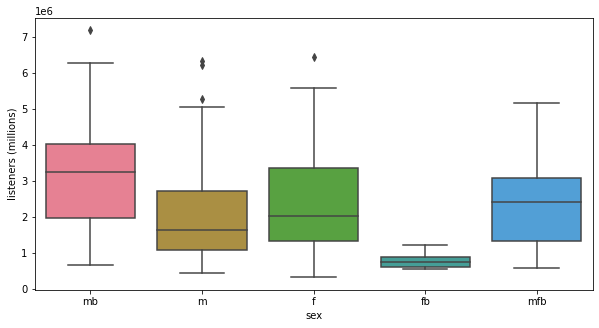

In [37]:
#sns.boxplot(data=penguins,x='species',y='body_mass_g',orient='v');
#plt.title('Body Mass Distribution by Species');
plt.figure(figsize=(10,5))
sns.set_palette("husl")
sns.boxplot(data=final_artists, x='sex', y='listeners')
plt.ylabel('listeners (millions)')
plt.savefig('listeners_sex.jpg')

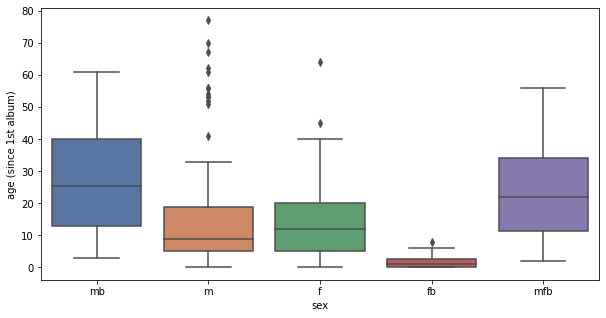

In [38]:
plt.figure(figsize=(10,5))
sns.set_palette("deep")
sns.boxplot(data=final_artists, x='sex', y='age (since 1st album)')
plt.savefig('sex_age.jpg')

<AxesSubplot:xlabel='age (since 1st album)', ylabel='playcount'>

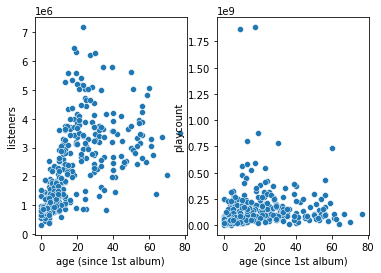

In [209]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=final_artists, x='age (since 1st album)', y='listeners')
plt.subplot(1, 2, 2)
sns.scatterplot(data=final_artists, x='age (since 1st album)', y = 'playcount')

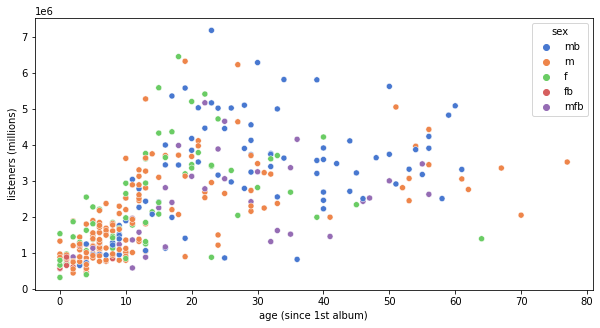

In [36]:
plt.figure(figsize=(10,5))
sns.set_palette("muted")
sns.scatterplot(data=final_artists, x='age (since 1st album)', y='listeners', hue='sex')
plt.ylabel('listeners (millions)')
#plt.savefig('age_listeners_sex.jpg')

121
114


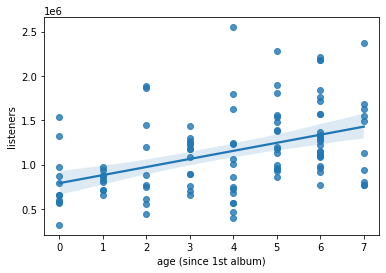

In [106]:
sns.regplot(data=final_artists[final_artists['age (since 1st album)'] < 8], 
                x='age (since 1st album)', y='listeners')
print(len(final_artists[(final_artists['age (since 1st album)'] >= 8) & 
                        (final_artists['age (since 1st album)'] <= 21)]))
print(len(final_artists[final_artists['age (since 1st album)'] > 21]))

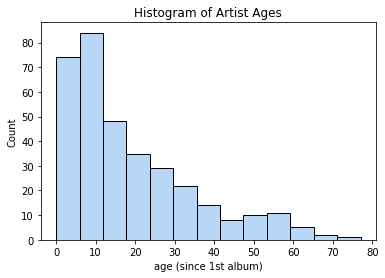

In [65]:
plt.title('Histogram of Artist Ages')
sns.set_palette("pastel")
sns.histplot(data=final_artists['age (since 1st album)'])
#plt.savefig('age_hist.jpg')

In [92]:
final_artists[(final_artists['age (since 1st album)'] > 10) & 
                        (final_artists['age (since 1st album)'] <= 30)]

name  ontour  playcount  listeners            genre1   genre2  \
0    Pierce The Veil       0   81849436    1131032     post hardcore  emocore   
1         Ed Sheeran       1  179979468    3125873          acoustic  british   
2        Nicki Minaj       1  183090599    3609036           hip hop      rap   
3               Muse       0  418280263    5015125  alternative rock     rock   
10      Gwen Stefani       1   52033052    3193923               pop    dance   
..               ...     ...        ...        ...               ...      ...   
335          50 Cent       1   68549028    3676268               rap  hip hop   
337    The Alchemist       0   22828321     897015           hip hop      rap   
338         Deftones       0  252879073    2789174          nu metal    metal   
339           Future       0  177789857    1929532           hip hop      rap   
342      Frank Ocean       1  404409989    2888623               rnb     soul   

                genre3 sex  first_album  age (since 1st album)  
0                  emo  mb       2007.0                   16.0  
1    singer songwriter   m       2011.0                   12.0  
2                  rnb   f       2010.0                   13.0  
3          alternative  mb       1999.0                   24.0  
10                rock   f       2004.0                   19.0  
..                 ...  ..          ...                    ...  
335        gangsta rap   m       2003.0                   20.0  
337           producer   m       2004.0                   19.0  
338        alternative  mb       1995.0                   28.0  
339               trap   m       2012.0                   11.0  
342            hip hop   m       2012.0                   11.0  

[126 rows x 10 columns]

<AxesSubplot:xlabel='age (since 1st album)', ylabel='playcount'>

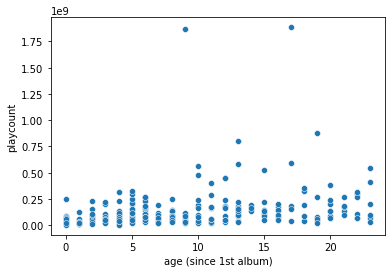

In [74]:
sns.scatterplot(data=final_artists[final_artists['age (since 1st album)'] <= 23], 
                x='age (since 1st album)', y='playcount')
#sns.stripplot(x='x', y='y', data=df, jitter=True, marker='o', color='blue')


<AxesSubplot:xlabel='age (since 1st album)', ylabel='listeners'>

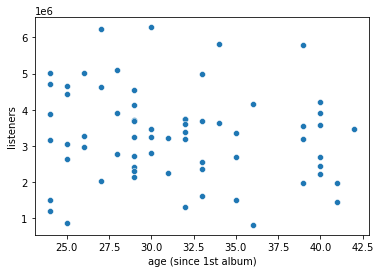

In [70]:
sns.scatterplot(data=
                final_artists[(final_artists['age (since 1st album)'] > 23) & 
                              (final_artists['age (since 1st album)'] <= 43)], x='age (since 1st album)',
                y='listeners')

In [226]:
final_artists[(final_artists['genre1'] == 'hip hop') | (final_artists['genre2'] == 'hip hop') | (
    final_artists['genre3'] == 'hip hop')]

name  ontour  playcount  listeners       genre1  \
2               Nicki Minaj       1  183090599    3609036      hip hop   
12               Young Thug       0   99877669    1230730         trap   
14                   Miguel       1   41001567    1806385          rnb   
20                    Drake       1  585984507    5271101      hip hop   
25                    Aminé       0   43979981    1080343          rap   
30               Snoop Dogg       0   58619042    3477215      hip hop   
31             BROCKHAMPTON       0  147132525    1225380      hip hop   
32                 Lil Baby       0   87543405     991768      hip hop   
37                  Cardi B       1   46216748    1541688      hip hop   
40               Tory Lanez       0   55619530    1136364          rnb   
50               Madvillain       0   75662650    1406586      hip hop   
51                Lil Wayne       0   39840909    1216021          rap   
55               Gucci Mane       0   39565707    2065701      hip hop   
56                Timbaland       0   41314995    2649880      hip hop   
57                     Joji       0  203101307    1897038        lo fi   
58                  Pitbull       1   58290687    3130613      hip hop   
60                   Eminem       0  372779519    6220579          rap   
62                Lil Nas X       0   88177700    1885911      hip hop   
67            The Kid Laroi       0   74432430    1327248          rap   
73                 Gorillaz       0  315472165    5164053  alternative   
74                    Migos       0   45045049    1287950      hip hop   
76                  Dr. Dre       0   63652853    3227597      hip hop   
79              $uicideboy$       1  208102134     956220    cloud rap   
85              Jack Harlow       0   48949415    1174668          rap   
86               Mac Miller       0  241766629    2451390      hip hop   
87              Kodak Black       1   56780086    1111291         trap   
95             Denzel Curry       0   86829834    1017370      hip hop   
105               JPEGMAFIA       0  114363268     771808      hip hop   
106           Isaiah Rashad       0   47086609     798773      hip hop   
107                Kid Cudi       0  192770252    3748223      hip hop   
111                  Offset       0   19037653     859521         trap   
112             Chris Brown       0   88986792    3711876          rnb   
118              Lil Yachty       1   61109583    1101159         trap   
120             Don Toliver       1   64228661    1173829          rap   
121        Childish Gambino       0  172204010    2509443      hip hop   
133            Metro Boomin       1  115601933    1476293         trap   
137             Joey Bada$$       0   67617951    1178342      hip hop   
140  SKI MASK THE SLUMP GOD       0   40552116     859086      hip hop   
143      Tyler, the Creator       0  449879030    2612923      hip hop   
145              STRAY KIDS       0  204525147     652028        k pop   
149     Megan Thee Stallion       0   74510557    1294954          rap   
154  A BOOGIE WIT DA HOODIE       0   56635224     917905      hip hop   
161                   LUCKI       0  104190202     568471         trap   
164                LIL PEEP       0  170048154    1269350    cloud rap   
165          Kendrick Lamar       1  446291037    3303503      hip hop   
167              Kanye West       0  879809322    6316432      hip hop   
180            LIL UZI VERT       0  225628470    1711961         trap   
185            xxxtentacion       0  180641582    1764023      hip hop   
186         Earl Sweatshirt       0   94412968    1124686      hip hop   
187           Bryson Tiller       0   40958713     935577          rnb   
190               21 Savage       0  103015945    1310659         trap   
191         Black Eyed Peas       0  103968896    4650746      hip hop   
195               DJ Khaled       0   40347429    2200724      hip hop   
201              Juice WRLD

In [19]:
indiv_genres = []
for genre in top_10_genres['index']:
    indiv_genres.append(final_artists[(final_artists['genre1'] == genre) | (final_artists['genre2'] == genre) | (
    final_artists['genre3'] == genre)])

In [20]:
indiv_genres
print(top_10_genres['index'])
indie_pop_artists, alternative_artists, electronic_artists, trap_artists, rnb_artists, indie_artists, rock_artists, rap_artists, hh_artists, p_artists = indiv_genres
#for i in range(len(indiv_genres)):
#    indiv_genres[i]['main_genre'] = top_10_genres['index'].loc[i]


0      indie pop
1    alternative
2     electronic
3           trap
4            rnb
5          indie
6           rock
7            rap
8        hip hop
9            pop
Name: index, dtype: object


/var/folders/4y/y3hs02ss4znbc2g25t39dkwc0000gq/T/ipykernel_23513/3974262239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiv_genres[i]['main_genre'] = top_10_genres['index'].loc[i]
/var/folders/4y/y3hs02ss4znbc2g25t39dkwc0000gq/T/ipykernel_23513/3974262239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indiv_genres[i]['main_genre'] = top_10_genres['index'].loc[i]
/var/folders/4y/y3hs02ss4znbc2g25t39dkwc0000gq/T/ipykernel_23513/3974262239.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [21]:
top_10_full = pd.concat(indiv_genres)

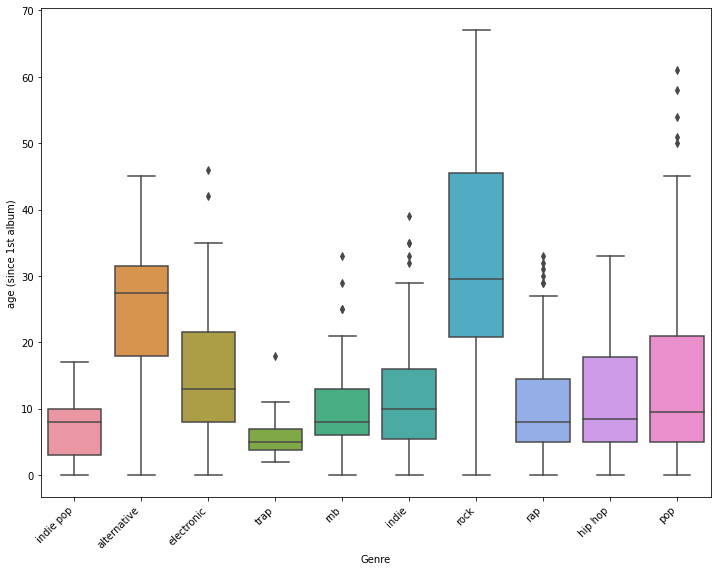

In [30]:
plt.figure(figsize=(12,9))
sns.set_palette('Set2')
sns.boxplot(data=top_10_full, x='main_genre', y='age (since 1st album)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha="right");
plt.savefig('genre_age.jpeg')

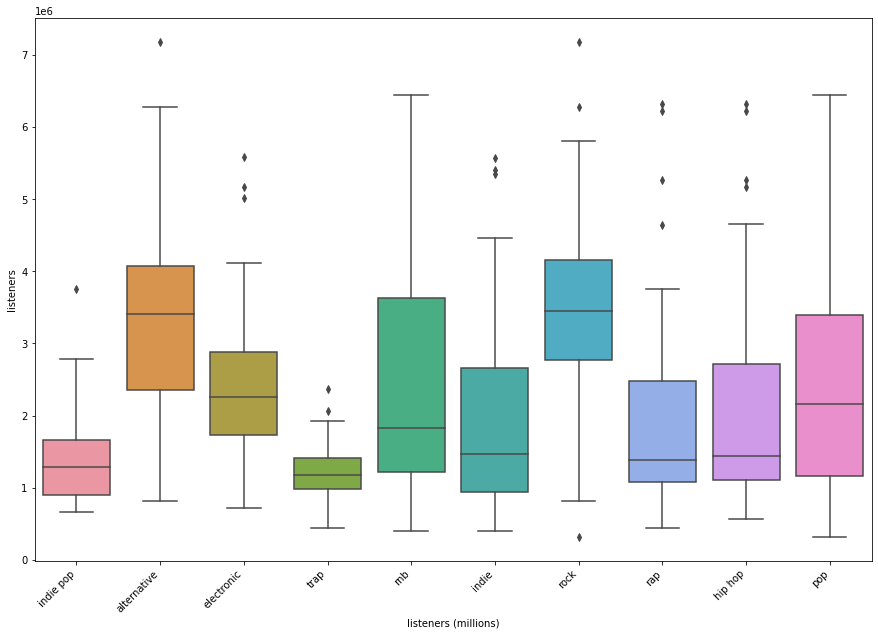

In [78]:
plt.figure(figsize=(15,10))
sns.set_palette('Set2')
sns.boxplot(data=top_10_full, x='main_genre',y='listeners');
plt.xticks(rotation=45, ha="right");
plt.xlabel('listeners (millions)')
#plt.savefig('genres_listeners.jpg')

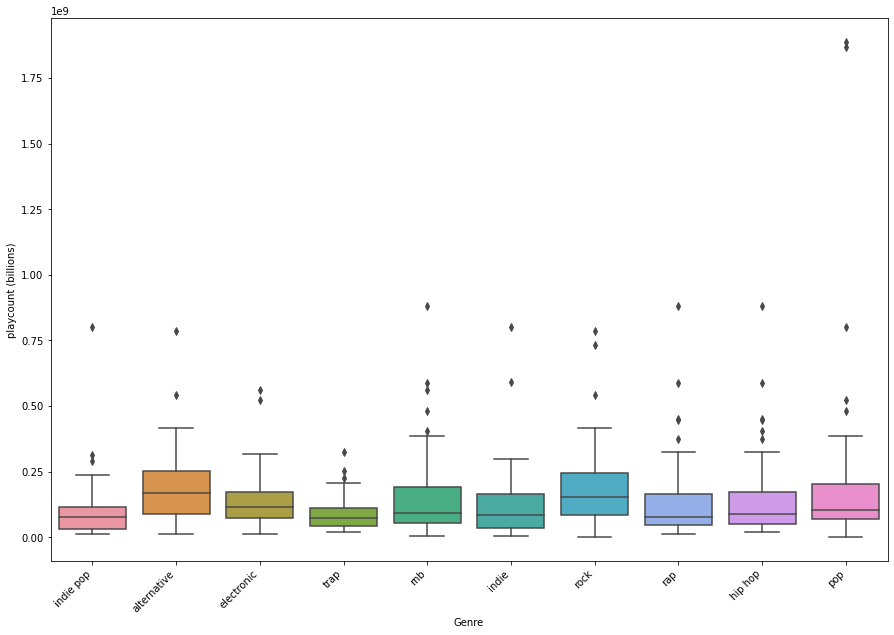

In [88]:
plt.figure(figsize=(15,10))
sns.set_palette('Set2')
sns.boxplot(data=top_10_full, x='main_genre',y='playcount');
plt.xticks(rotation=45, ha="right");
plt.ylabel('playcount (billions)')
plt.xlabel('Genre')
#plt.savefig('playcount_genres.jpg')

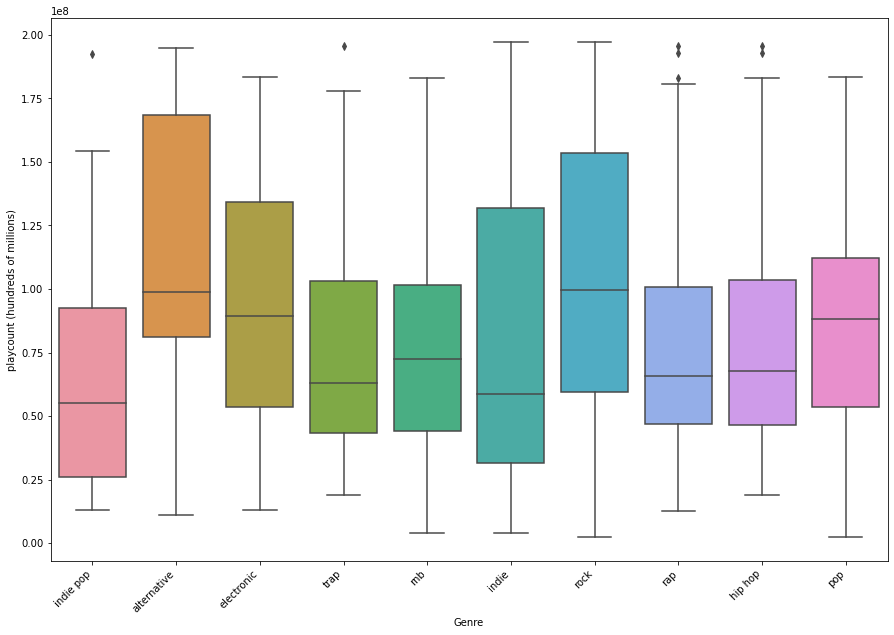

In [90]:
plt.figure(figsize=(15,10))
sns.set_palette('Set2')
sns.boxplot(data=top_10_full[top_10_full['playcount'] < 200000000], x='main_genre',y='playcount');
plt.xticks(rotation=45, ha="right");
plt.ylabel('playcount (hundreds of millions)')
plt.xlabel('Genre')
#plt.savefig('playcount_genres_small.jpg')

In [15]:
final_artists[final_artists['sex'] == 'm']

name  ontour  playcount  listeners    genre1        genre2  \
1       Ed Sheeran       1  179979468    3125873  acoustic       british   
7       Elton John       0  105311040    3960105       pop  classic rock   
12      Young Thug       0   99877669    1230730      trap       hip hop   
14          Miguel       1   41001567    1806385       rnb          soul   
16      The Weeknd       0  561111265    3622518       rnb    electronic   
..             ...     ...        ...        ...       ...           ...   
332    Marvin Gaye       0   54355707    2760027      soul        motown   
335        50 Cent       1   68549028    3676268       rap       hip hop   
337  The Alchemist       0   22828321     897015   hip hop           rap   
339         Future       0  177789857    1929532   hip hop           rap   
342    Frank Ocean       1  404409989    2888623       rnb          soul   

                genre3 sex  first_album  age (since 1st album)  
1    singer songwriter   m       2011.0                   12.0  
7    singer songwriter   m       1969.0                   54.0  
12                 rap   m       2019.0                    4.0  
14             hip hop   m       2010.0                   13.0  
16             dubstep   m       2013.0                   10.0  
..                 ...  ..          ...                    ...  
332               funk   m       1961.0                   62.0  
335        gangsta rap   m       2003.0                   20.0  
337           producer   m       2004.0                   19.0  
339               trap   m       2012.0                   11.0  
342            hip hop   m       2012.0                   11.0  

[142 rows x 10 columns]